Ujian

In [186]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

ModuleNotFoundError: No module named 'pingouin'

Read Data

In [ ]:
nbaplayer = pd.read_csv('data_input/nba_players.csv')
nbaplayer.head()

In [ ]:
newplayer = pd.read_csv('data_input/new_players.csv')
newplayer.head()

In [ ]:
target_test = ['potential_player']
var_test = ['age', 'player_height', 'player_weight', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

In [ ]:
x_np_test = newplayer[var_test]

In [ ]:
x_np_test.head()

In [ ]:
x_test.head()

Data Preprocessing

Variable Selection (Manual)

In [ ]:
target = ['potential_player']
var = ['age', 'player_height', 'player_weight', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

In [ ]:
x = nbaplayer[var]
y = nbaplayer[target]

In [ ]:
x.describe()

Missing Value

In [187]:
x.isna()

,age,player_height,player_weight,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
11140,False,False,False,False,False,False,False,False,False,False,False
11141,False,False,False,False,False,False,False,False,False,False,False
11142,False,False,False,False,False,False,False,False,False,False,False
11143,False,False,False,False,False,False,False,False,False,False,False


In [188]:
x = x.dropna()
x

,age,player_height,player_weight,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040
...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064
11141,23.0,195.58,97.522280,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033
11142,28.0,213.36,117.933920,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076
11143,27.0,208.28,104.779752,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056


In [189]:
x.isna().sum()/len(x)*100

age              0.0
player_height    0.0
player_weight    0.0
reb              0.0
ast              0.0
net_rating       0.0
oreb_pct         0.0
dreb_pct         0.0
usg_pct          0.0
ts_pct           0.0
ast_pct          0.0
dtype: float64

From the observation, we found no missing data in our dataset

Cross Validation

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=2903)

Exploratory Data Analysis

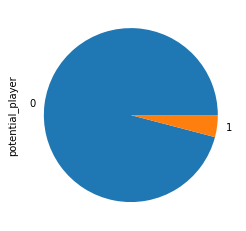

In [191]:
y_train['potential_player'].value_counts(normalize=True).plot(kind='pie')
plt.show()

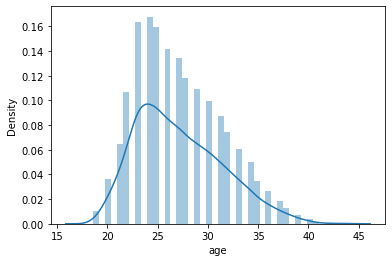

In [192]:
sns.distplot(x_train['age']) # numeric
plt.show()

Modelling (Logistic Regression)

In [193]:
import statsmodels.api as sm

In [194]:
sm_logit_init = sm.Logit(y_train, sm.add_constant(x_train))
result_init = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.149643
         Iterations 10


In [195]:
print(result_init.summary())

                           Logit Regression Results                           
Dep. Variable:       potential_player   No. Observations:                  682
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                           11
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.7841
Time:                        13:41:23   Log-Likelihood:                -102.06
converged:                       True   LL-Null:                       -472.73
Covariance Type:            nonrobust   LLR p-value:                7.363e-152
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -32.2550      8.382     -3.848      0.000     -48.683     -15.827
age               0.0007      0.050      0.015      0.988      -0.097       0.098
player_height     0.0827      0.042     

In [196]:
y_pred_np = result_init.predict(sm.add_constant(x_np_test))

In [197]:
y_pred_np

0      0.000297
1      0.007856
2      0.959169
3      0.000314
4      0.000475
         ...   
495    0.158620
496    0.014131
497    0.000764
498    0.000494
499    0.543953
Length: 500, dtype: float64

In [198]:
y_pred_np_class = np.where(y_pred_np>0.5, 1, 0)
y_pred_np_class

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [199]:
newplayer['potential_player'] = y_pred_np_class
newplayer

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0


Modelling (KNN)

In [200]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)

In [201]:
print('Accuracy score :', accuracy_score(y_test, y_pred))

Accuracy score : 0.9709364908503767


In [202]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [203]:
make_conf_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,2659,14,2673
a_1,67,47,114
total_prediction,2726,61,2787


Choose Factor K

In [204]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train, y_train.values.ravel())
    
    y_pred_train = knn_i.predict(x_train)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn_i.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

In [205]:
[testing_accuracies, training_accuracies]

[[0.9662719770362397,
  0.9709364908503767,
  0.971654108360244,
  0.9680660208109078,
  0.9662719770362397,
  0.9655543595263725,
  0.964119124506638,
  0.9626838894869035,
  0.9630426982418371,
  0.9630426982418371,
  0.9623250807319699,
  0.9626838894869035,
  0.9623250807319699,
  0.961248654467169,
  0.9616074632221027],
 [1.0,
  0.98336922708782,
  0.9773869346733668,
  0.9746350801627184,
  0.9716439339554918,
  0.9703278296243121,
  0.9687724335965542,
  0.9676956209619526,
  0.9663795166307729,
  0.9659009332376166,
  0.9653027039961714,
  0.9645848289064369,
  0.9642258913615698,
  0.9632687245752573,
  0.9636276621201244]]

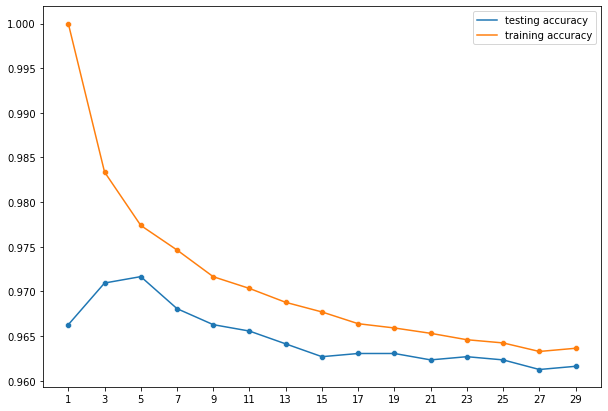

In [206]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xticks(list(k))
plt.show()

In [207]:
print('best k:', best_k)
print('accuracy:', score)

best k: 5
accuracy: 0.971654108360244


The best factor k for this case is 1 with 93.68% accuracy. The performance improved again from 92.64% accuracy to 93.68% accuracy.

In [208]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2673
           1       0.77      0.41      0.54       114

    accuracy                           0.97      2787
   macro avg       0.87      0.70      0.76      2787
weighted avg       0.97      0.97      0.97      2787



Model Performance in Data 'newplayer'

In [209]:
y_knnpred_np = knn.predict(x_np_test)

In [210]:
y_knnpred_np

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [211]:
y_knnpred_np_class = np.where(y_knnpred_np>0.5, 1, 0)
y_knnpred_np_class

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [212]:
newplayer['potential_player'] = y_pred_np_class
newplayer

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0


Exploratory Data Analysis - Model Modified

In [213]:
rus = RandomUnderSampler()
x_newtrain, y_newtrain = rus.fit_resample(x_train, y_train)

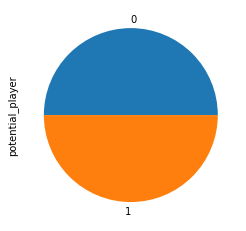

In [214]:
y_newtrain['potential_player'].value_counts(normalize=True).plot(kind='pie')
plt.show()

Modelling (Logistic Regression) - Model Improvement

In [215]:
import statsmodels.api as sm

In [216]:
sm_logit = sm.Logit(y_newtrain, sm.add_constant(x_newtrain))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.147374
         Iterations 10


In [217]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:       potential_player   No. Observations:                  682
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                           11
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.7874
Time:                        13:41:31   Log-Likelihood:                -100.51
converged:                       True   LL-Null:                       -472.73
Covariance Type:            nonrobust   LLR p-value:                1.596e-152
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -26.4528      8.671     -3.051      0.002     -43.447      -9.459
age              -0.0343      0.052     -0.660      0.509      -0.136       0.068
player_height     0.0889      0.046     

Modelling (KNN) - Model Modified

Scalling Data - Model Modified

In [218]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [219]:
scaler = MinMaxScaler()
scaler.fit(x_newtrain)
x_train_scaled = scaler.transform(x_newtrain)
x_test_scaled = scaler.transform(x_test)

In [220]:
x_train_scaled[:5]

array([[0.76190476, 1.        , 0.97777778, 0.56934307, 0.15384615,
        0.57606264, 0.142     , 0.81081081, 0.4340176 , 0.568     ,
        0.20810313],
       [0.47619048, 0.72222222, 0.51851852, 0.25547445, 0.11111111,
        0.47203579, 0.072     , 0.3993994 , 0.17595308, 0.54      ,
        0.17495396],
       [0.38095238, 0.77777778, 0.59259259, 0.29927007, 0.11965812,
        0.43736018, 0.212     , 0.27327327, 0.17302053, 0.473     ,
        0.16206262],
       [0.0952381 , 0.66666667, 0.62962963, 0.35036496, 0.00854701,
        0.44630872, 0.216     , 0.81081081, 0.08504399, 0.606     ,
        0.02209945],
       [0.28571429, 0.77777778, 0.77777778, 0.42335766, 0.11965812,
        0.31767338, 0.18      , 0.52852853, 0.34017595, 0.432     ,
        0.17679558]])

In [221]:
x_newtrain.head()

,age,player_height,player_weight,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,35.0,220.98,132.448864,7.8,1.8,9.0,0.071,0.270,0.215,0.568,0.113
1,29.0,208.28,104.326160,3.5,1.3,-0.3,0.036,0.133,0.127,0.540,0.095
2,27.0,210.82,108.862080,4.1,1.4,-3.4,0.106,0.091,0.126,0.473,0.088
3,21.0,205.74,111.130040,4.8,0.1,-2.6,0.108,0.270,0.096,0.606,0.012
4,25.0,210.82,120.201880,5.8,1.4,-14.1,0.090,0.176,0.183,0.432,0.096


In [222]:
x_newtrain.describe()

,age,player_height,player_weight,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,27.005865,198.745689,98.722104,4.689443,3.907478,0.568915,0.047110,0.142925,0.223959,0.531230,0.208468
std,3.927010,8.726715,11.912277,2.543260,2.816422,8.099568,0.039673,0.053924,0.061701,0.073759,0.117218
min,19.000000,175.260000,72.574720,0.000000,0.000000,-42.500000,0.000000,0.000000,0.067000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,2.825000,1.200000,-3.700000,0.023000,0.105000,0.180000,0.501000,0.096000
50%,27.000000,198.120000,97.975872,4.500000,4.100000,1.500000,0.036000,0.132000,0.221000,0.537000,0.216000
75%,30.000000,205.740000,106.594120,6.075000,5.800000,5.100000,0.061000,0.175750,0.268750,0.569000,0.285750
max,40.000000,220.980000,133.809640,13.700000,11.700000,46.900000,0.500000,0.333000,0.408000,1.000000,0.543000


In [223]:
knn_scaled = KNeighborsClassifier(n_neighbors=5, p=2)
knn_scaled.fit(x_train_scaled, y_newtrain.values.ravel())
y_pred_scaled = knn_scaled.predict(x_test_scaled)

In [224]:
print('Accuracy score :', accuracy_score(y_test, y_pred_scaled))

Accuracy score : 0.9289558665231432


In [225]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [226]:
make_conf_matrix(confusion_matrix(y_test, y_pred_scaled))

,p_0,p_1,total_actual
a_0,2475,198,2673
a_1,0,114,114
total_prediction,2475,312,2787


Choose Factor K - Model Modified

In [227]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train_scaled, y_newtrain.values.ravel())
    
    y_pred_train = knn_i.predict(x_train_scaled)
    training_accuracies.append(accuracy_score(y_newtrain, y_pred_train))
    
    y_pred_test = knn_i.predict(x_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

In [228]:
[testing_accuracies, training_accuracies]

[[0.9368496591316828,
  0.930032292787944,
  0.9289558665231432,
  0.9282382490132759,
  0.9307499102978113,
  0.9311087190527448,
  0.9278794402583423,
  0.927161822748475,
  0.9264442052386078,
  0.9257265877287406,
  0.9232149264442052,
  0.9221385001794044,
  0.9217796914244708,
  0.9207032651596699,
  0.9199856476498026],
 [1.0,
  0.9706744868035191,
  0.966275659824047,
  0.9633431085043989,
  0.9618768328445748,
  0.9604105571847508,
  0.9589442815249267,
  0.9574780058651027,
  0.9589442815249267,
  0.9604105571847508,
  0.9604105571847508,
  0.9589442815249267,
  0.9589442815249267,
  0.9574780058651027,
  0.9589442815249267]]

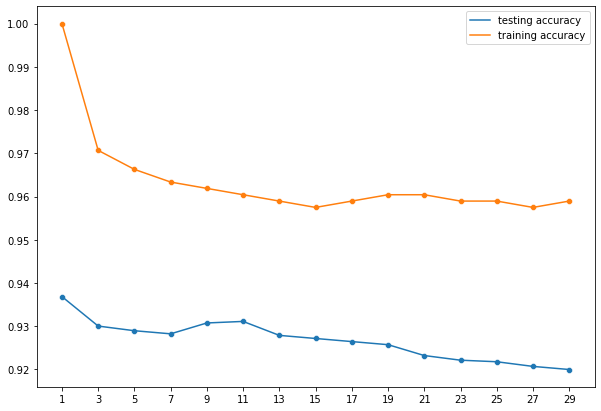

In [229]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xticks(list(k))
plt.show()

In [230]:
print('best k:', best_k)
print('accuracy:', score)

best k: 1
accuracy: 0.9368496591316828


The best factor k for this case is  with 93.68% accuracy. The performance improved again from 93.07% accuracy to 93.64% accuracy.

In [231]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2673
           1       0.37      1.00      0.54       114

    accuracy                           0.93      2787
   macro avg       0.68      0.96      0.75      2787
weighted avg       0.97      0.93      0.94      2787



Model Evaluation

In [232]:
skfold_init = StratifiedKFold(n_splits=5)

logreg_cv_init = cross_val_score(logreg, x_train, y_train, cv = skfold)
knn_cv_init = cross_val_score(knn, x_train, y_train, cv = skfold)

In [233]:
print('CV Logreg:', logreg_cv_init)
print('CV KNN:', knn_cv_init)

CV Logreg: [0.96770335 0.96590909 0.96411483 0.96229803 0.96888091]
CV KNN: [0.96052632 0.97009569 0.96710526 0.96888091 0.97127469]


We are interested in positive class only, thus we use recall

In [234]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_rc_init = cross_val_score(logreg, x_train, y_train, cv = skfold, scoring='recall')
knn_cv_rc_init = cross_val_score(knn, x_train, y_train, cv = skfold, scoring='recall')

In [235]:
print('CV Logreg:', logreg_cv_rc_init)
print('CV KNN:', knn_cv_rc_init)

CV Logreg: [0.39705882 0.38235294 0.37681159 0.42647059 0.36764706]
CV KNN: [0.22058824 0.39705882 0.4057971  0.42647059 0.42647059]


Model Evaluation - Model Modified

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [237]:
# model benchmark
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()

In [238]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, x_newtrain, y_newtrain, cv = skfold)
knn_cv = cross_val_score(knn, x_newtrain, y_newtrain, cv = skfold)

In [239]:
print('CV Logreg:', logreg_cv)
print('CV KNN:', knn_cv)

CV Logreg: [0.96350365 0.89051095 0.91911765 0.94117647 0.91176471]
CV KNN: [0.94160584 0.91240876 0.83823529 0.86764706 0.88235294]


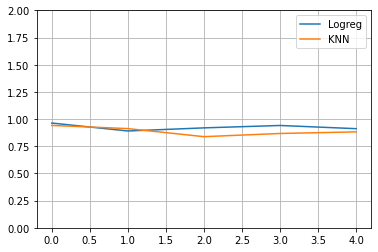

In [240]:
import matplotlib.pyplot as plt

plt.plot(range(len(logreg_cv)), logreg_cv, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv, label='KNN')
plt.ylim(0,2)
plt.grid()
plt.legend()
plt.show()

In [241]:
print('CV Logreg:', logreg_cv.mean())
print('CV KNN:', knn_cv.mean())

CV Logreg: 0.9252146844139115
CV KNN: 0.8884499785315587


In [242]:
print('CV Logreg:', logreg_cv.std())
print('CV KNN:', knn_cv.std())

CV Logreg: 0.0250728878306946
CV KNN: 0.03575197498748848


We are interested in positive class only, thus we use recall

In [243]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_rc = cross_val_score(logreg, x_newtrain, y_newtrain, cv = skfold, scoring='recall')
knn_cv_rc = cross_val_score(knn, x_newtrain, y_newtrain, cv = skfold, scoring='recall')

In [244]:
print('CV Logreg:', logreg_cv_rc)
print('CV KNN:', knn_cv_rc)

CV Logreg: [0.98529412 0.85507246 0.98529412 0.95588235 0.97058824]
CV KNN: [0.98529412 0.92753623 0.86764706 0.91176471 0.91176471]


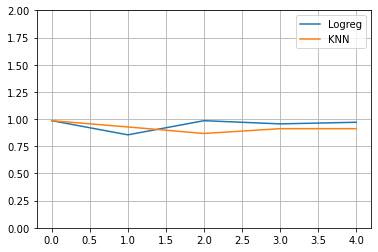

In [245]:
plt.plot(range(len(logreg_cv_rc)), logreg_cv_rc, label='Logreg')
plt.plot(range(len(knn_cv_rc)), knn_cv_rc, label='KNN')
plt.ylim(0,2)
plt.grid()
plt.legend()
plt.show()

Conclusion

Recall values in initial model are lower than the improved model, although the accuracy in initial model are higher.
Thus we decide to use improved model to be applied to data test 'newplayer' in order to identify the potential player to be recruited.

In [246]:
best = newplayer['potential_player'] == 1

In [247]:
newplayer_to_be_recruited = newplayer[best]
newplayer_to_be_recruited

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
7,7,8,27.0,200.66,99.790240,Southern California,USA,74,27.3,5.2,3.9,3.3,0.030,0.134,0.342,0.552,0.204,1
17,17,18,28.0,175.26,83.914520,Washington,USA,76,28.9,2.7,5.9,5.0,0.019,0.070,0.337,0.625,0.305,1
24,24,25,28.0,185.42,92.986360,North Carolina,USA,60,11.4,2.5,6.5,4.1,0.016,0.076,0.210,0.491,0.320,1
31,31,32,21.0,198.12,95.254320,Kentucky,USA,54,24.9,4.5,4.7,-9.3,0.013,0.112,0.301,0.561,0.233,1
48,48,49,32.0,203.20,97.522280,Butler Community College,USA,81,20.6,5.0,3.7,1.4,0.031,0.121,0.275,0.518,0.170,1
53,53,54,30.0,182.88,88.450440,Texas-El Paso,USA,81,20.3,3.4,8.6,8.9,0.018,0.083,0.264,0.532,0.404,1
59,59,60,31.0,187.96,83.914520,None,France,66,20.3,3.0,7.6,10.7,0.010,0.091,0.280,0.588,0.396,1
62,62,63,24.0,198.12,95.707912,Washington,USA,78,22.6,4.7,5.1,8.9,0.044,0.115,0.274,0.573,0.243,1
72,72,73,27.0,200.66,97.522280,Wisconsin,USA,82,22.6,6.3,5.3,0.0,0.038,0.121,0.252,0.522,0.213,1


In [248]:
newplayer['potential_player'].value_counts()

0    448
1     52
Name: potential_player, dtype: int64